In [80]:
import sqlite3
import pandas as pd

In [81]:
db = sqlite3.connect('IMDB.sqlite')

Question: IMDB.sqlite' database contains all details of movies and has three tables with name IMDB, genre and earning.

Find the most voted movie in IMDB Movie Database.

Print the movie name and the rating of that movie.

In [82]:
df = pd.read_sql_query('select * from IMDB',db)

In [83]:
df.head(2)

,Movie_id,Title,Rating,TotalVotes,MetaCritic,Budget,Runtime,CVotes10,CVotes09,CVotes08,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,VotesIMDB,Votes1000,VotesUS,VotesnUS
0,36809,12 Years a Slave (2013),8.1,496092,96,20000000.0,134 min,75556,126223,161460,...,8.0,7.9,8.0,7.8,7.8,8.1,8.0,7.7,8.3,8.0
1,30114,127 Hours (2010),7.6,297075,82,18000000.0,94 min,28939,44110,98845,...,7.5,7.5,7.5,7.3,7.3,7.5,7.6,7.0,7.7,7.6


In [84]:
df.columns

Index(['Movie_id', 'Title', 'Rating', 'TotalVotes', 'MetaCritic', 'Budget',
       'Runtime', 'CVotes10', 'CVotes09', 'CVotes08', 'CVotes07', 'CVotes06',
       'CVotes05', 'CVotes04', 'CVotes03', 'CVotes02', 'CVotes01',
       'CVotesMale', 'CVotesFemale', 'CVotesU18', 'CVotesU18M', 'CVotesU18F',
       'CVotes1829', 'CVotes1829M', 'CVotes1829F', 'CVotes3044', 'CVotes3044M',
       'CVotes3044F', 'CVotes45A', 'CVotes45AM', 'CVotes45AF', 'CVotes1000',
       'CVotesUS', 'CVotesnUS', 'VotesM', 'VotesF', 'VotesU18', 'VotesU18M',
       'VotesU18F', 'Votes1829', 'Votes1829M', 'Votes1829F', 'Votes3044',
       'Votes3044M', 'Votes3044F', 'Votes45A', 'Votes45AM', 'Votes45AF',
       'VotesIMDB', 'Votes1000', 'VotesUS', 'VotesnUS'],
      dtype='object')

In [85]:
# We need TotalVotes column and Title
max1 = max(df['TotalVotes'])

# Take the row out where totalVotes = max1
row = df[df['TotalVotes'] == max1]

In [86]:
# We have to print the movie name and the rating of the movie
print(row['Title'].values[0],row['Rating'].values[0])

Inception (2010) 8.8


IMDB.sqlite database contains all details of movies and has three tables with name IMDB, genre and earning.

Find the Movie with Longest-Running Time from IMDB Movie database.

Print the name of movie and running time as integer value.

Note: Don't print 'min' in running time.

In [87]:
import numpy as np
df1 = pd.read_sql_query('select * from IMDB',db)


In [88]:
def trim(string):
    return string.strip().split(" ")[0]

df1['Runtime'] = df1['Runtime'].apply(trim)
df1['Runtime'] = df1['Runtime'].dropna()
df1['Runtime'].replace('',np.nan,inplace=True)
df1['Runtime'] = df1['Runtime'].astype(float).dropna()
ans = df1['Runtime'].astype(float)

In [89]:
df1.dropna(inplace=True)
ans = ans.dropna()
ans = ans.astype(int)
max2 = max(ans)

In [90]:
df1['Runtime'] = df1['Runtime'].astype(int)

In [91]:
print(max2)
row = df1[df1['Runtime'] == max2]

180


In [92]:
print(row['Title'].values[0],(row['Runtime'].values[0]))

The Wolf of Wall Street (2013) 180


IMDB.sqlite database contains all details of movies and has three tables with name IMDB, genre and earning.

Find the movie which has maximum net profit in IMDB Movie Database.

Print the movie name.

Note: Net Profit= Total Earning(Domestic+WorldWide earning) - budget

In [93]:
df2 = pd.read_sql_query('select * from earning inner join IMDB on earning.Movie_id = IMDB.Movie_id',db)

In [94]:
df2 = df2.dropna()

In [95]:
df2.head(3)

,Movie_id,Domestic,Worldwide,Movie_id,Title,Rating,TotalVotes,MetaCritic,Budget,Runtime,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,VotesIMDB,Votes1000,VotesUS,VotesnUS
0,36809,56671993,187733202.0,36809,12 Years a Slave (2013),8.1,496092,96,20000000.0,134 min,...,8.0,7.9,8.0,7.8,7.8,8.1,8.0,7.7,8.3,8.0
1,30114,18335230,60738797.0,30114,127 Hours (2010),7.6,297075,82,18000000.0,94 min,...,7.5,7.5,7.5,7.3,7.3,7.5,7.6,7.0,7.7,7.6
2,37367,35014192,39187783.0,37367,50/50 (2011),7.7,283935,72,8000000.0,100 min,...,7.6,7.6,7.6,7.4,7.4,7.5,7.4,7.0,7.9,7.6


In [96]:
df2['Profit'] = (df2['Domestic']+df2['Worldwide'])

In [97]:
df2.head()

,Movie_id,Domestic,Worldwide,Movie_id,Title,Rating,TotalVotes,MetaCritic,Budget,Runtime,...,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,VotesIMDB,Votes1000,VotesUS,VotesnUS,Profit
0,36809,56671993,187733202.0,36809,12 Years a Slave (2013),8.1,496092,96,20000000.0,134 min,...,7.9,8.0,7.8,7.8,8.1,8.0,7.7,8.3,8.0,244405195.0
1,30114,18335230,60738797.0,30114,127 Hours (2010),7.6,297075,82,18000000.0,94 min,...,7.5,7.5,7.3,7.3,7.5,7.6,7.0,7.7,7.6,79074027.0
2,37367,35014192,39187783.0,37367,50/50 (2011),7.7,283935,72,8000000.0,100 min,...,7.6,7.6,7.4,7.4,7.5,7.4,7.0,7.9,7.6,74201975.0
3,49473,15322921,87100449.0,49473,About Time (2013),7.8,225412,,12000000.0,123 min,...,7.6,7.7,7.6,7.5,7.8,7.7,6.9,7.8,7.7,102423370.0
4,14867,6739492,19839492.0,14867,Amour (2012),7.9,76121,94,8900000.0,127 min,...,7.7,7.9,7.9,7.8,8.1,6.6,7.2,7.9,7.8,26578984.0


In [132]:
df2['Budget'].replace('',np.nan,inplace=True)
df2['Budget'].astype(float)
df2['Budget'].dropna(inplace=True)
df2['Net_Profit'] = df2['Profit'] - df2['Budget']

In [134]:
max3 = max(df2['Net_Profit'])

In [135]:
print(max3)

2759885849.0


In [136]:
row = df2[df2['Net_Profit'] == max3]
row

,Movie_id,Domestic,Worldwide,Movie_id,Title,Rating,TotalVotes,MetaCritic,Budget,Runtime,...,Votes3044F,Votes45A,Votes45AM,Votes45AF,VotesIMDB,Votes1000,VotesUS,VotesnUS,Profit,Net_Profit
79,38626,936662225,2.068224e+09,38626,Star Wars: The Force Awakens (2015),8.1,676732,81,245000000.0,136 min,...,8.2,7.9,7.8,8.2,8.3,7.7,8.2,7.9,3.004886e+09,2.759886e+09


In [137]:
print(df2.values[0][3])
print(df2['Title'].values[0])

36809
12 Years a Slave (2013)


IMDB.sqlite database contains all details of movies and has three tables with name IMDB, genre and earning.

Find the least budgeted movie in IMDB Movie Database.

If there is more than one least budgeted movies then print the movie which has maximum net profit.

Note: Net Profit= Total Earning(Domestic+WorldWide earning) - budget

In [138]:
min1 = min(df2['Budget'])

In [141]:
row = df2[df2['Budget'] == min1]
row

,Movie_id,Domestic,Worldwide,Movie_id,Title,Rating,TotalVotes,MetaCritic,Budget,Runtime,...,Votes3044F,Votes45A,Votes45AM,Votes45AF,VotesIMDB,Votes1000,VotesUS,VotesnUS,Profit,Net_Profit
71,30154,1013100,1013100.0,30154,Short Term 12 (2013),8.0,63459,82,1000000.0,,...,7.9,7.7,7.7,8.0,8.5,7.0,8.3,7.9,2026200.0,1026200.0
109,20709,22321,22321.0,20709,Tyrannosaur (2011),7.6,26016,65,1000000.0,,...,7.5,7.5,7.4,5.8,6.5,7.4,7.6,,44642.0,-955358.0


In [140]:
import pandas as pd
import numpy as np
import sqlite3

db = sqlite3.connect('IMDB.sqlite')

data = pd.read_sql_query('select * from earning join IMDB using(Movie_id)',db)

data['Total'] = data['Domestic'] + data['Worldwide']
data['Budget'].replace('',np.nan,inplace=True)
data['Budget'].astype(float)
data['Profit']=data['Total']-data['Budget']

min1 = min(data['Budget'])
data=data[data['Budget']==min1]
# data=data[data['Profit']==max(data['Profit'])]
print(data['Profit'].values[0])
print(data['Title'].values[0])

1026200.0
Short Term 12 (2013)


IMDB.sqlite' database contains all details of movies and has three tables with name IMDB, genre and earning.

Find the highest-grossing movie (i.e domestic earning + worldwide earning) in IMDB database year wise.

Print the Year and name of the movie which was the highest grosser in that year.

Note:Print the year in ascending order.

In [154]:
# db = sqlite3.connect('IMDB.sqlite')

# data = pd.read_sql_query('select * from earning join IMDB using(Movie_id)',db)

# data['Total'] = data['Domestic'] + data['Worldwide']

# def year(title):
#     return int(title.strip().split(" ")[-1][-5:-1])

# data['Year'] = data["Title"].apply(year)
# # data['Year'].unique()
# print(data['Year'])
# m = data.groupby('Year')['Total'].max()
# print(m)
# d = {}
# for i in range(len(data['Total'])):
#     if data['Total'][i] in (m.values):
#         key = data['Year'][i]
#         value = data['Title'][i]
#         d[key] = value
# for i in sorted(d):
#     print(i,d[i])

In [164]:
df3 = pd.read_sql_query('select * from earning inner join IMDB on earning.Movie_id = IMDB.Movie_id',db)

In [165]:
df3['Total_Earning'] = df3['Domestic'] + df3['Worldwide']

In [169]:
def Get_Year(string):
    return int(string.strip().split(" ")[-1][-5:-1])

df3['Year'] = df3['Title'].apply(Get_Year)
ans = df3.groupby('Year')['Total_Earning'].max()
# print(ans)
d = {}
for i in range(0,len(df3['Total_Earning'])):
    if df3['Total_Earning'][i] in (ans.values):
        key = df3['Year'][i]
        value = df3['Title'][i]
        d[key] = value
for i in sorted(d):
    print(i,d[i])

2010 Toy Story 3 (2010)
2011 Rise of the Planet of the Apes (2011)
2012 The Avengers (2012)
2013 The Hunger Games: Catching Fire (2013)
2014 Guardians of the Galaxy (2014)
2015 Star Wars: The Force Awakens (2015)
2016 Rogue One (2016)


IMDB.sqlite' database contains all details of movies and has three tables with name IMDB, genre and earning.

Find out the percentage of the budget for each genre in IMDB Movie Dataset?Plot the pie chart.

Print the genre and percentage of movies budget present in that genre with 2 decimal place after rounding off..

Note: Movies has multiple genres, so calculate the percentage for each genre.Replace empty budget column to zero.

In [245]:
df4 = pd.read_sql_query('select imdb.movie_id,title,budget,genre from IMDB inner join genre on IMDB.Movie_id = genre.Movie_id',db)
df4.dropna(inplace=True)

In [246]:
df4[df4['Budget'] == ""] = 0
df4['Budget'].dropna(inplace=True)

In [247]:
df4['Budget']=df4['Budget'].astype(float)
# OR
# df4['Budget'] = pd.to_numeric(data['Budget'])

In [248]:
df4['Budget'] = df4['Budget'].replace('',np.nan)

In [249]:
ans = df4.groupby('genre')['Budget'].sum()

In [255]:
genre = ans[2:].index
Budget = ans[2:].values
print(genre)
print(Budget)

Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western'],
      dtype='object', name='genre')
[4.3325e+09 6.0467e+09 1.8452e+09 6.2450e+08 1.7401e+09 4.2650e+08
 2.6144e+09 4.6000e+08 1.0940e+09 1.7300e+08 6.6000e+06 3.7300e+07
 6.1000e+07 4.6900e+08 2.7090e+08 2.5960e+09 1.1000e+08 9.6150e+08
 8.7000e+07 1.3800e+08]


In [257]:
x = np.true_divide(Budget,Budget.sum())*100

array([17.98150592, 25.09608121,  7.65827461,  2.59191009,  7.22207004,
        1.77013555, 10.85074416,  1.90917316,  4.54051182,  0.71801512,
        0.02739248,  0.15480904,  0.25317296,  1.94652655,  1.12433698,
       10.77437724,  0.45654141,  3.99058695,  0.36108275,  0.57275195])

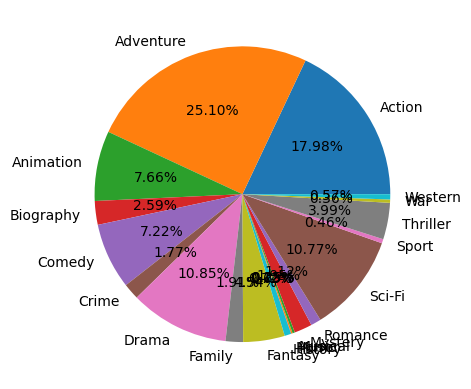

In [260]:
import matplotlib.pyplot as plt
plt.pie(x,labels=genre,autopct="%.2f%%")
plt.show()


IMDB.sqlite' database contains all details of movies and has three tables with name IMDB, genre and earning.

Find out the percentage of the total earning for each genre in IMDB Movie Dataset?Plot the pie chart.

Print the genre and percentage of movies total earning present in that genre with 2 decimal place after rounding off.

Note: Movies has multiple genres, so calculate the percentage for each genre.Total Earning=Domestic earning + WorldWide earning.

In [262]:
df5 = pd.read_sql_query('select * from genre inner join earning on genre.Movie_id = earning.Movie_id',db)

In [265]:
df5['Total'] = df5['Domestic'] + df5['Worldwide']
df5

,Movie_id,genre,Movie_id,Domestic,Worldwide,Total
0,36809,Biography,36809,56671993,1.877332e+08,2.444052e+08
1,30114,Adventure,30114,18335230,6.073880e+07,7.907403e+07
2,37367,Comedy,37367,35014192,3.918778e+07,7.420198e+07
3,49473,Comedy,49473,15322921,8.710045e+07,1.024234e+08
4,14867,Drama,14867,6739492,1.983949e+07,2.657898e+07
...,...,...,...,...,...,...
346,38262,,38262,13092000,4.898204e+07,6.207404e+07
347,10023,Comedy,10023,189422889,4.712229e+08,6.606458e+08
348,27783,Sci-Fi,27783,233921534,7.478628e+08,9.817843e+08
349,42294,Sci-Fi,42294,146408305,3.536241e+08,5.000324e+08


In [268]:
ans = df5.groupby('genre')['Total'].sum()
ans

genre
             1.153443e+10
Action       2.788521e+10
Adventure    3.669282e+10
Animation    1.053621e+10
Biography    5.323303e+09
Comedy       1.197469e+10
Crime        2.411969e+09
Drama        1.861607e+10
Family       1.633854e+09
Fantasy      8.022713e+09
History      1.625677e+09
Horror       1.470580e+07
Music        6.757072e+08
Musical      5.906195e+08
Mystery      3.134103e+09
Romance      2.263643e+09
Sci-Fi       1.548841e+10
Sport        5.058611e+08
Thriller     6.881591e+09
War          3.957106e+08
Western      1.011694e+09
Name: Total, dtype: float64

In [269]:
title = ans[2:].index
earn = ans[2:].values

In [271]:
for i in range(0,len(title)):
    print(title[i],format((earn[i]/earn.sum())*100,'.2f'))

Adventure 28.71
Animation 8.24
Biography 4.17
Comedy 9.37
Crime 1.89
Drama 14.57
Family 1.28
Fantasy 6.28
History 1.27
Horror 0.01
Music 0.53
Musical 0.46
Mystery 2.45
Romance 1.77
Sci-Fi 12.12
Sport 0.40
Thriller 5.38
War 0.31
Western 0.79


IMDB.sqlite' database contains all details of movies and has three tables with name IMDB, genre and earning.

Find the movie which has genre of 'Sci-Fi' and 'Mystery' and movie rating is greater or equal to 8 from IMDB Movie Database.

Print the movie name.

Movies has multiple genre.

In [281]:
df6 = pd.read_sql_query('select * from genre inner join IMDB on genre.Movie_id = IMDB.Movie_id',db)
df6.head(3)

,Movie_id,genre,Movie_id,Title,Rating,TotalVotes,MetaCritic,Budget,Runtime,CVotes10,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,VotesIMDB,Votes1000,VotesUS,VotesnUS
0,36809,Biography,36809,12 Years a Slave (2013),8.1,496092,96,20000000.0,134 min,75556,...,8.0,7.9,8.0,7.8,7.8,8.1,8.0,7.7,8.3,8.0
1,30114,Adventure,30114,127 Hours (2010),7.6,297075,82,18000000.0,94 min,28939,...,7.5,7.5,7.5,7.3,7.3,7.5,7.6,7.0,7.7,7.6
2,37367,Comedy,37367,50/50 (2011),7.7,283935,72,8000000.0,100 min,28304,...,7.6,7.6,7.6,7.4,7.4,7.5,7.4,7.0,7.9,7.6


In [282]:
df6 = df6[((df6['genre'] == 'Sci-Fi') & (df6['Rating'] >= 8)) | ((df6['genre'] == 'Mystery') & (df6['Rating'] >= 8))]

In [285]:
print(df6['Title'].values[0] )

Shutter Island (2010)


In [286]:
data = pd.read_sql_query('Select * from IMDB join genre using(Movie_id)',db)
data = data[((data["genre"]=='Sci-Fi') & (data["Rating"]>=8)) | ((data["genre"]=='Mystery') & (data["Rating"]>=8))]
print(data['Title'].values[0] )

Arrival (2016)
